## Problem Statement

- Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. 


- New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.


- Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. 


- Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.


- Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# code to display rows and columns

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Importing dataset

In [6]:
df = pd.read_csv("churn.csv")

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Problem Type

Conclusions after understanding the data set:-

- The target variable is Churn


- The target variable is categorical in nature


- Solving it as a Classification problem


- Based on the number of inputs we have to classify customer churn  

# Checking the data types

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data types include:

- Object
- Float
- Int

### Lets check for duplicate values

In [10]:
df.duplicated().sum()

0

### No duplicates in the dataset

### Lets check for missing values

In [11]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Luckly no missing values in the dataset

### Data Shape

In [12]:
df.shape

(7043, 21)

Rows --> 7043

Columns --> 21

#### Column names

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# EDA

In [14]:
sns.set_theme(style="darkgrid")

Male      3555
Female    3488
Name: gender, dtype: int64

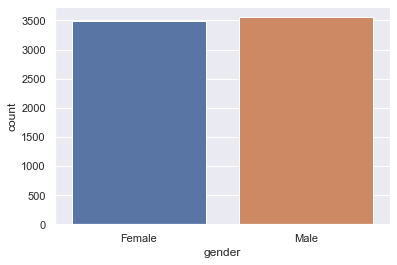

In [15]:
#Univariate
sns.countplot(x="gender",data=df)
df["gender"].value_counts()

Observations from the plot:

There are a total of 3555 male customers

There are a total of 3488 female customers

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

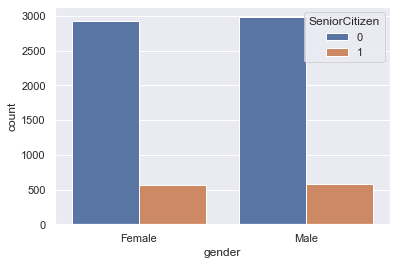

In [16]:
#Univariate
sns.countplot(x="gender",hue="SeniorCitizen",data=df)
df["SeniorCitizen"].value_counts()

Observations from the plot:

Very few Senior Citizens in both male and female customers

It's normal to lose customers after a certain age

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

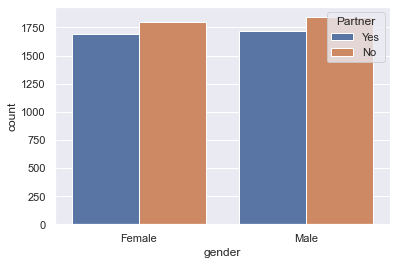

In [17]:
#Univariate
sns.countplot(x="gender",hue="Partner",data=df)
df["SeniorCitizen"].value_counts()

Observations from the plot:

Most of the customers both male and female are Married or are having some kind of relationship with a partner

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

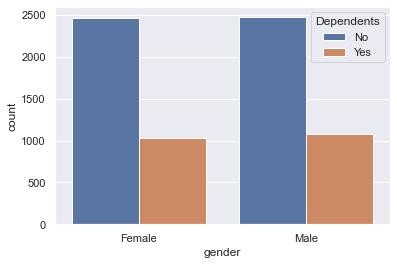

In [18]:
#Univariate
sns.countplot(x="gender",hue="Dependents",data=df)
df["SeniorCitizen"].value_counts()

Observations from the plot:

Both Male and Female customers have less Dependents on them

<AxesSubplot:xlabel='tenure', ylabel='gender'>

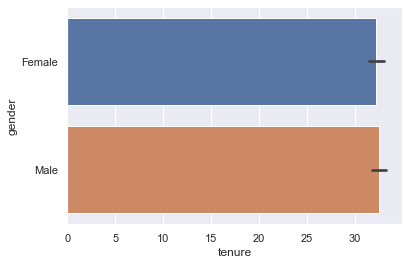

In [19]:
#Univariate
sns.barplot(y="gender",x="tenure",data=df)

Observations from the plot:

Same tenure for both male and female customers 

<AxesSubplot:xlabel='gender', ylabel='count'>

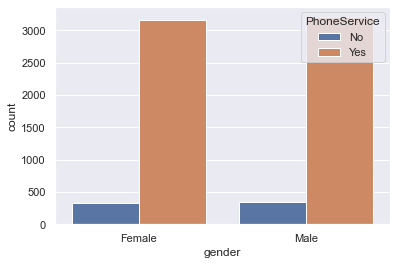

In [20]:
#Univariate
sns.countplot(x="gender",hue="PhoneService",data=df)

Observations from the plot:

Most of Male and Female customers are using Phone service 

<AxesSubplot:xlabel='gender', ylabel='count'>

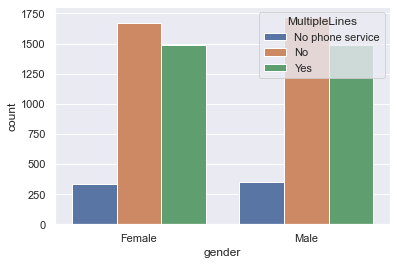

In [21]:
#Univariate
sns.countplot(x="gender",hue="MultipleLines",data=df)

Observations from the plot:

Very few customers are having no phone service

A good amount of people are having multiple lines

<AxesSubplot:xlabel='gender', ylabel='count'>

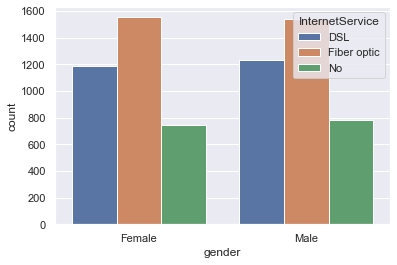

In [22]:
sns.countplot(x="gender",hue="InternetService",data=df)

Observations from the plot:

Most of the people are having Internet services

Most of the customers are preferring fiber optic cable

There are some customers who have no internet service

<AxesSubplot:xlabel='gender', ylabel='count'>

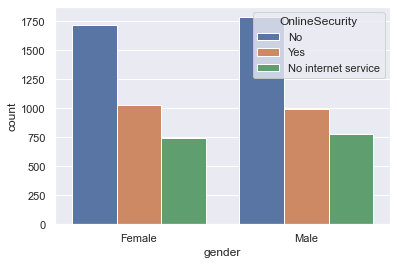

In [23]:
sns.countplot(x="gender",hue="OnlineSecurity",data=df)

Observations from the plot:

Most of the customers are not having internet security

Only some customers are having internet security

<AxesSubplot:xlabel='gender', ylabel='count'>

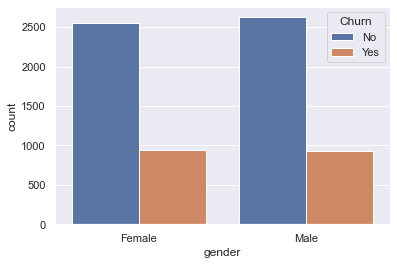

In [24]:
sns.countplot(x="gender",hue="Churn",data=df)

Observations from the plot:

The number of female customers who left are slightly more than the male customers

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

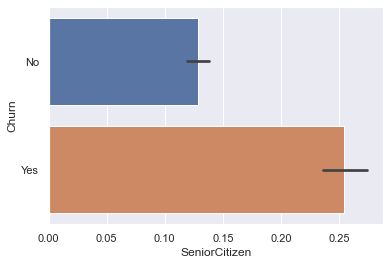

In [25]:
sns.barplot(x="SeniorCitizen",y="Churn",data=df)

Observations from the plot:

The company lost a high amount of Senior customers 

<AxesSubplot:xlabel='Partner', ylabel='count'>

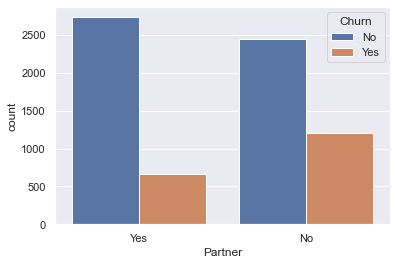

In [26]:
sns.countplot(x="Partner",hue="Churn",data=df)

Observations from the plot:

We can clearly say that the customers with no partners are having a higher tendency to leave the service

<AxesSubplot:xlabel='Dependents', ylabel='count'>

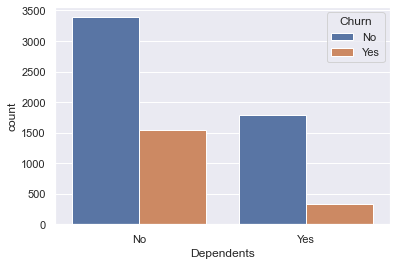

In [27]:
sns.countplot(x="Dependents",hue="Churn",data=df)

Observations from the plot:

Customers with no Dependents are are having a higher chance of leaving 

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

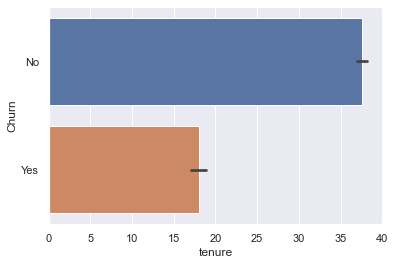

In [28]:
sns.barplot(x="tenure",y="Churn",data=df)

Observations from the plot:
    
Customers having a higher tenure with the company have a higher chance of not leaving

Customers with a low tenure can possibly leave the membership

<AxesSubplot:xlabel='InternetService', ylabel='count'>

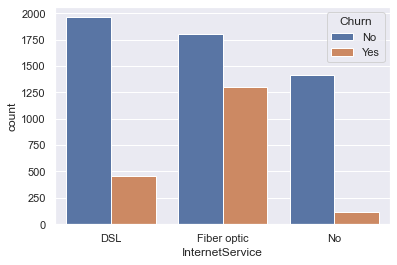

In [29]:
sns.countplot(x="InternetService",hue="Churn",data=df)

Observations from the plot:

Customers with fiber optic cable internet connection have a higher chance of leaving a membership

Customers with DSL cable connection are having a higher chance of not leaving the membership

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

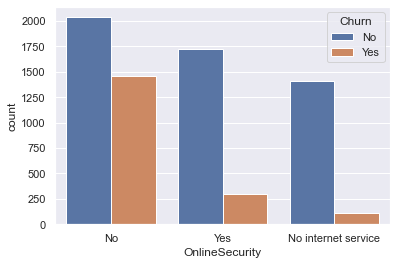

In [30]:
sns.countplot(x="OnlineSecurity",hue="Churn",data=df)

Observations from the plot:

Customers with no online security are having a high tendency to leave

Customers with online security have a higher tendency to stay

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

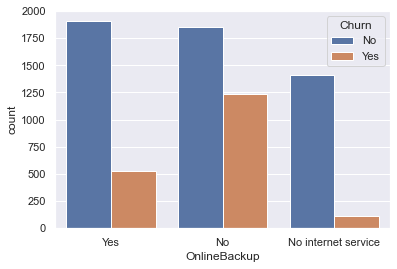

In [31]:
sns.countplot(x="OnlineBackup",hue="Churn",data=df)

Observations from the plot:

We can assume that online security or Online backup can be premium services so customers who have already purchased those features will have a low tendency to leave the membership

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

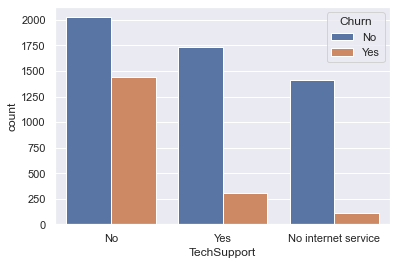

In [32]:
sns.countplot(x="TechSupport",hue="Churn",data=df)

Observations from the plot:
    
Most of the customers from whom the company failed to provide tech support left the membership

So the customers to did not receive proper tech support left the company

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

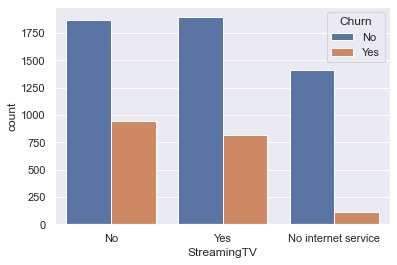

In [33]:
sns.countplot(x="StreamingTV",hue="Churn",data=df)

Observations from the plot:

There is a higher chance that the customer will stay if the individual's TV streaming services are valid or the customer has already purchased a long term plan

<AxesSubplot:xlabel='Contract', ylabel='count'>

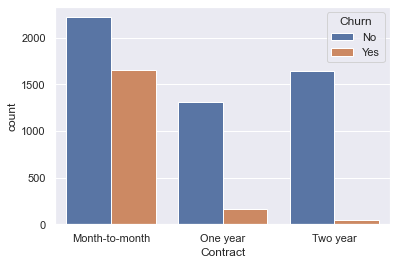

In [34]:
sns.countplot(x="Contract",hue="Churn",data=df)

Observations from the plot:

Customers have a high likelihood to stay if they have already purchased a long term plan

Most of the customers who have monthly contracts have a high tendency to leave as they don't have to worry about loss

<AxesSubplot:xlabel='count', ylabel='PaymentMethod'>

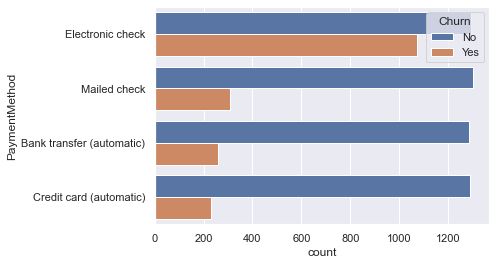

In [35]:
sns.countplot(y="PaymentMethod",hue="Churn",data=df)

Observations from the plot:

The customers who are using Electronic mail as a Payment method are having the highest tendency to leave the membership

Customers who are using credit card as the payment method have a lower tendency to leave
    
    

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

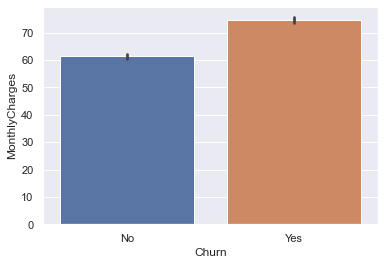

In [36]:
sns.barplot(y="MonthlyCharges",x="Churn",data=df)

Observations from the plot:

If the monthly charges of customers are above 60 then there is a high probability that they might leave the membership

Customers with monthly charges lower than 60 will probably stay 

In [37]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The column Total charges has the datatype Object we need to convert it into float

In [38]:
df["TotalCharges"].dtype

dtype('O')

In [39]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [40]:
df["TotalCharges"].dtype

dtype('float64')

Converted datatype to float

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

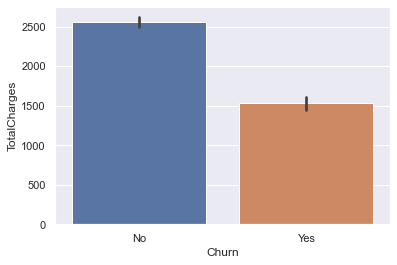

In [41]:
sns.barplot(y="TotalCharges",x="Churn",data=df)

Observations from the plot :

We can assume that if a customer has already paid for a long term membership then there is a high possibility that the customer will not leave the membership

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

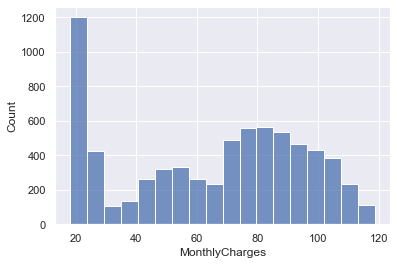

In [42]:
sns.histplot(x="MonthlyCharges",data=df)
df["MonthlyCharges"].describe()

Observations from the plot:

Highest number of customers have 20 $ as there monthly charges

Maximum monthly charge for a customer is 118 $

An important customer for the company

Lets check the customer with the highest monthly charge

In [43]:
df[df["MonthlyCharges"] == 118.75]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4586,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),118.75,8672.45,No


Observations:

It's a Female customer 

The customer uses all the services and has a contract of 2 years

The customer is using Fiber optic internet service

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

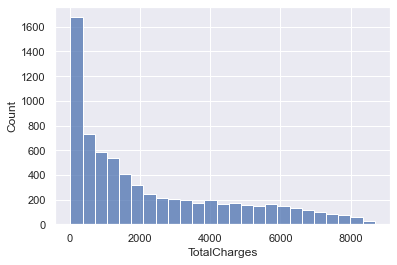

In [44]:
sns.histplot(x="TotalCharges",data=df)
df["TotalCharges"].describe()

Observations:

Max Total charges can go upto 8684.8$

Mean total charges per customer can go upto 2283.30 $

In [45]:
df[df["TotalCharges"] == 8684.8]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4610,2889-FPWRM,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),117.8,8684.8,Yes


Observations:

The individual is a male customer 

The customer has all the premium services available

The customer has a yearly contract

Fiber optic Internet connection

In [46]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


- if Churn = "Yes" then 1


- if Churn = "No" then 0

In [47]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [48]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Lets make seprate dataframes for the customers who left and the once who stayed

In [49]:
cust_L = df[df['Churn'] == 1]
cust_S = df[df['Churn'] == 0]

In [50]:
cust_L.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [51]:
cust_S.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0


In [52]:
print("Total Customers in company =", len(df))
print("\n")
print("Number of customers who left the company =", len(cust_L))
print("\n")
print("Percentage of customers who left the company =", 1.*len(cust_L)/len(df)*100.0, "%")
print("\n")
print("Number of customers who did not leave the company (stayed) =", len(cust_S))
print("\n")
print("Percentage of customers who did not leave the company (stayed) =", 1.*len(cust_S)/len(df)*100.0, "%")

Total Customers in company = 7043


Number of customers who left the company = 1869


Percentage of customers who left the company = 26.536987079369588 %


Number of customers who did not leave the company (stayed) = 5174


Percentage of customers who did not leave the company (stayed) = 73.4630129206304 %


Text(0.5, 0, 'Tenure')

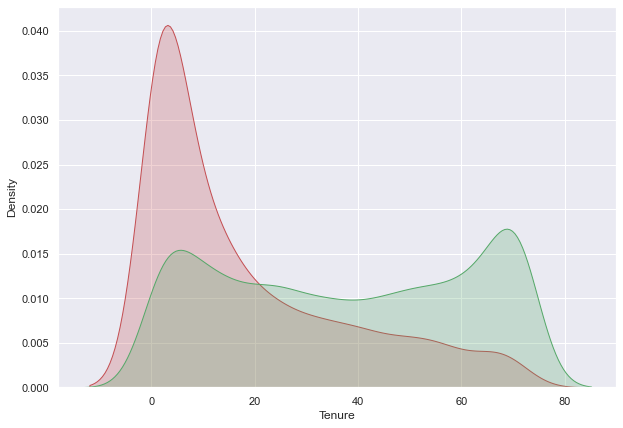

In [53]:
plt.figure(figsize=(10,7))

sns.kdeplot(cust_L['tenure'], label = 'Customers who left', shade = True, color = 'r')
sns.kdeplot(cust_S['tenure'], label = 'Customers who Stayed', shade = True, color = 'g')

plt.xlabel('Tenure')

Observations:

Most of the customers with lower tenure are leaving the service 

Higher the tenure higher are the chances that the customer will stay
    

Text(0.5, 0, 'Monthly Charges of a Customer')

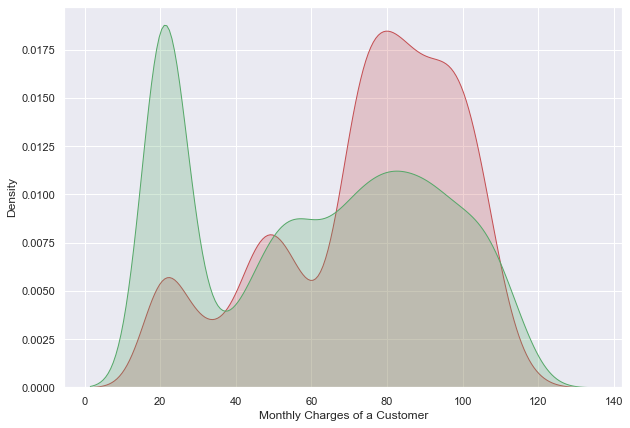

In [54]:
plt.figure(figsize=(10,7))

sns.kdeplot(cust_L['MonthlyCharges'], label = 'Customers who left', shade = True, color = 'r')
sns.kdeplot(cust_S['MonthlyCharges'], label = 'Customers who Stayed', shade = True, color = 'g')

plt.xlabel('Monthly Charges of a Customer')

Observations:

The customers with monthly charges more that 60$ have a higher tendency to leave

Text(0.5, 0, 'Total Charges of a Customer')

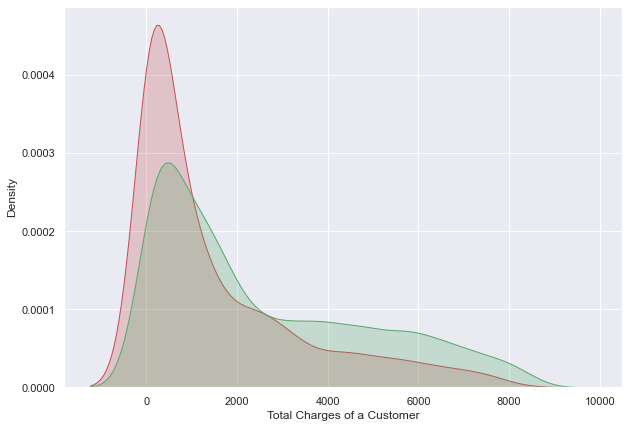

In [55]:
plt.figure(figsize=(10,7))

sns.kdeplot(cust_L['TotalCharges'], label = 'Customers who left', shade = True, color = 'r')
sns.kdeplot(cust_S['TotalCharges'], label = 'Customers who Stayed', shade = True, color = 'g')

plt.xlabel('Total Charges of a Customer')

Observations:
    
We can clearly conclude that most of the customers with long term plan will not leave the membership as they have already paid

So it's important for the company to give attractive offers especially on long term plans in order to retain or increase customers

# Data Cleaning

In [56]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [57]:
df["TotalCharges"].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [58]:
df["TotalCharges"].median()

1397.475

In [59]:
df["TotalCharges"] = df["TotalCharges"].replace(np.nan,1397.475)

In [60]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No more null values

## Outliers

Creating seprate dataframe for continuous and categorical variables

In [61]:
df_continuous = df[["tenure","MonthlyCharges","TotalCharges"]]

In [62]:
df_continuous.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [63]:
df_categorical = df.drop(["tenure","MonthlyCharges","TotalCharges"],axis=1)

In [64]:
df_categorical.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


<AxesSubplot:>

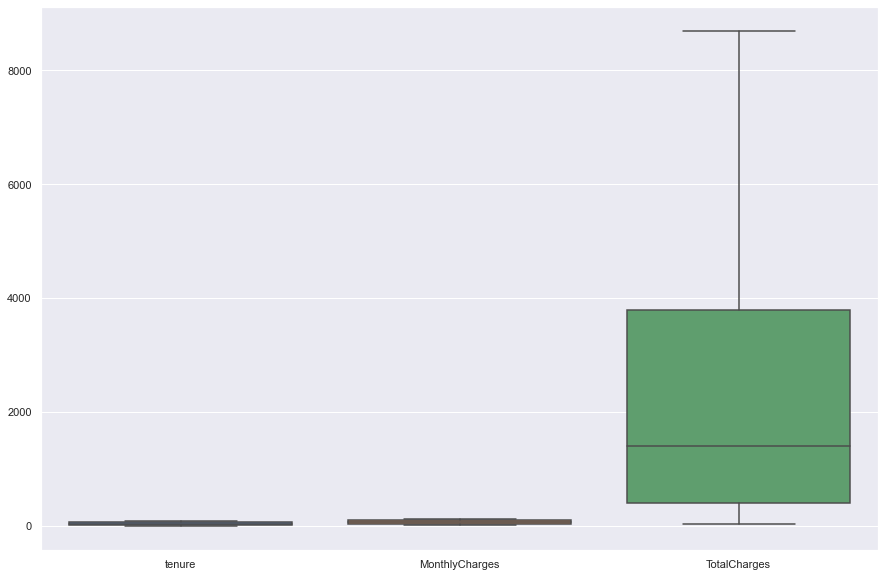

In [65]:
plt.figure(figsize=(15, 10))
sns.boxplot(data =df_continuous)

No outliers in continuous variables

In [66]:
from scipy import stats

# creating function to count outliers

def outliers(cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    IQR = stats.iqr(df[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",df[df[cname] < L_outlier][cname].count())
    print("Right Outliers :",df[df[cname] > U_outlier][cname].count())

In [67]:
outliers("tenure")

The first quartile : 9.0 for tenure
The third quartile : 55.0 for tenure
The IQR : 46.0 for tenure
The left outlier : -60.0 for tenure
The Right outlier : 124.0 for tenure
Left Outliers : 0
Right Outliers : 0


No outliers in Tenure

In [68]:
outliers("MonthlyCharges")

The first quartile : 35.5 for MonthlyCharges
The third quartile : 89.85 for MonthlyCharges
The IQR : 54.349999999999994 for MonthlyCharges
The left outlier : -46.02499999999999 for MonthlyCharges
The Right outlier : 171.375 for MonthlyCharges
Left Outliers : 0
Right Outliers : 0


No outliers in MonthlyCharges

In [69]:
outliers("TotalCharges")

The first quartile : 402.225 for TotalCharges
The third quartile : 3786.6 for TotalCharges
The IQR : 3384.375 for TotalCharges
The left outlier : -4674.3375 for TotalCharges
The Right outlier : 8863.1625 for TotalCharges
Left Outliers : 0
Right Outliers : 0


No outliers in Total charges

## Checking skewness in data

We dont have to worry about the skewness in Categorical variables

In [70]:
df_continuous.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963789
dtype: float64

We can go ahead with this skewness values

## Encoding

In [72]:
df_continuous.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [73]:
df_categorical.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


Droping the customer ID column

In [74]:
df_categorical = df_categorical.drop("customerID",axis=1)

In [75]:
df_categorical.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,1


In [76]:
df_categorical = pd.get_dummies(data=df_categorical,drop_first=True)

In [77]:
df_categorical.head()

,SeniorCitizen,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [79]:
df = pd.concat([df_continuous,df_categorical],axis=1)

In [80]:
df.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [81]:
df.shape

(7043, 31)

### Correlation

In [211]:
cor = df.corr()

In [212]:
cor

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
tenure,1.000000,0.247900,0.825464,0.016567,-0.352229,0.005106,0.379697,0.159712,0.008448,-0.008448,0.331941,0.019720,-0.039062,-0.039062,0.327203,-0.039062,0.360277,-0.039062,0.360653,-0.039062,0.324221,-0.039062,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852
MonthlyCharges,0.247900,1.000000,0.650864,0.220173,0.193356,-0.014569,0.096848,-0.113890,0.247398,-0.247398,0.490434,0.787066,-0.763557,-0.763557,0.296594,-0.763557,0.441780,-0.763557,0.482692,-0.763557,0.338304,-0.763557,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437
TotalCharges,0.825464,0.650864,1.000000,0.102652,-0.199037,-0.000002,0.318364,0.063593,0.113013,-0.113013,0.468705,0.361045,-0.374706,-0.374706,0.412091,-0.374706,0.509607,-0.374706,0.522374,-0.374706,0.432329,-0.374706,0.515279,-0.374706,0.519884,0.170649,0.356226,0.158055,0.182745,-0.059971,-0.294814
SeniorCitizen,0.016567,0.220173,0.102652,1.000000,0.150889,-0.001874,0.016479,-0.211185,0.008576,-0.008576,0.142948,0.255338,-0.182742,-0.182742,-0.038653,-0.182742,0.066572,-0.182742,0.059428,-0.182742,-0.060625,-0.182742,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477
Churn,-0.352229,0.193356,-0.199037,0.150889,1.000000,-0.008612,-0.150448,-0.164221,0.011942,-0.011942,0.040102,0.308020,-0.227890,-0.227890,-0.171226,-0.227890,-0.082255,-0.227890,-0.066160,-0.227890,-0.164674,-0.227890,0.063228,-0.227890,0.061382,-0.177820,-0.302253,0.191825,-0.134302,0.301919,-0.091683
gender_Male,0.005106,-0.014569,-0.000002,-0.001874,-0.008612,1.000000,-0.001808,0.010517,-0.006488,0.006488,-0.008414,-0.011286,0.006026,0.006026,-0.017021,0.006026,-0.013773,0.006026,-0.002105,0.006026,-0.009212,0.006026,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744
Partner_Yes,0.379697,0.096848,0.318364,0.016479,-0.150448,-0.001808,1.000000,0.452676,0.017706,-0.017706,0.142057,0.000304,0.000615,0.000615,0.143106,0.000615,0.141498,0.000615,0.153786,0.000615,0.119999,0.000615,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125
Dependents_Yes,0.159712,-0.113890,0.063593,-0.211185,-0.164221,0.010517,0.452676,1.000000,-0.001762,0.001762,-0.024526,-0.165818,0.139812,0.139812,0.080972,0.139812,0.023671,0.139812,0.013963,0.139812,0.063268,0.139812,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071
PhoneService_Yes,0.008448,0.247398,0.113013,0.008576,0.011942,-0.006488,0.017706,-0.001762,1.000000,-1.000000,0.279690,0.289999,0.172209,0.172209,-0.092893,0.172209,-0.052312,0.172209,-0.071227,0.172209,-0.096340,0.172209,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319
MultipleLines_No phone service,-0.008448,-0.247398,-0.113013,-0.008576,-0.011942,0.006488,-0.017706,0.001762,-1.000000,1.000000,-0.279690,-0.289999,-0.172209,-0.172209,0.092893,-0.172209,0.052312,-0.172209,0.071227,-0.172209,0.096340,-0.172209,0.022574,-0.172209,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319


<AxesSubplot:>

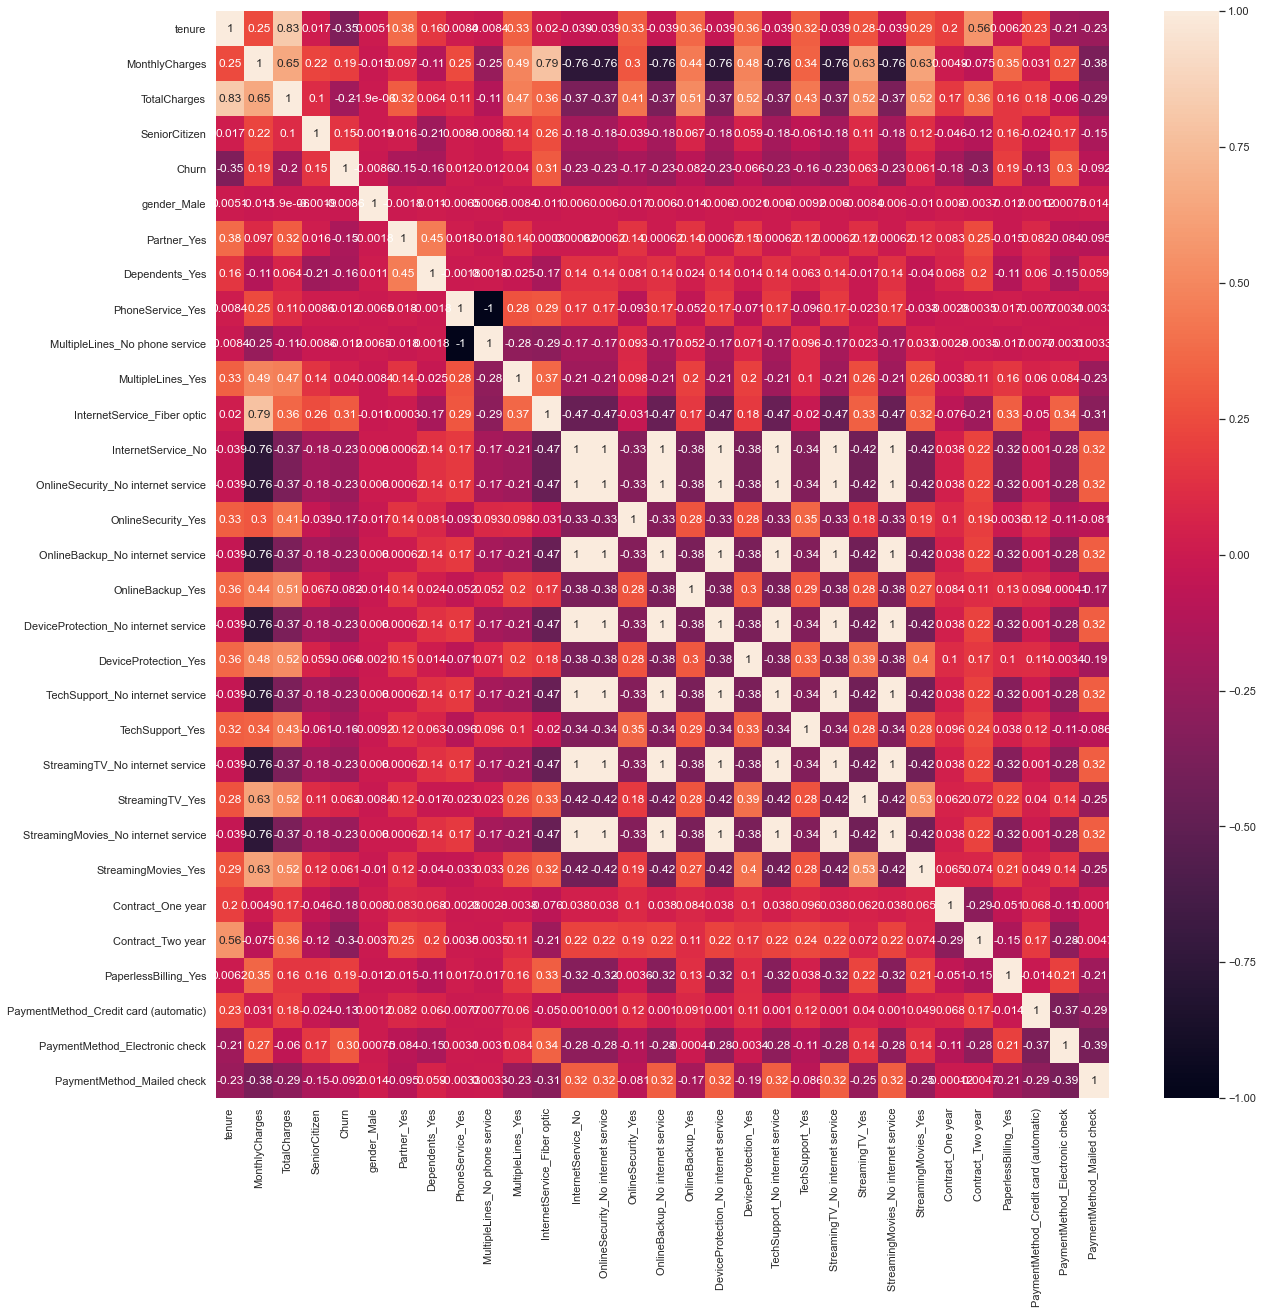

In [214]:
plt.figure(figsize=(20,20))
sns.heatmap(data=cor,annot=True)

The Heatmap is not visible clearly lets create a table

In [215]:
cor["Churn"].sort_values(ascending=False)

Churn                                    1.000000
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
PaperlessBilling_Yes                     0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService_Yes                         0.011942
gender_Male                             -0.008612
MultipleLines_No phone service          -0.011942
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes                        -0.082255
PaymentMethod_Mailed check              -0.091683
PaymentMethod_Credit card (automatic)   -0.134302
Partner_Yes                             -0.150448
Dependents_Yes                          -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226


Best Correlations with target variable:


- InternetService_Fiber optic


- PaymentMethod_Electronic check


- MonthlyCharges 

## Train Test Split

In [82]:
df.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [83]:
X =df.drop("Churn",axis=1)
y = df["Churn"]

In [84]:
X.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [85]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [86]:
X = X.values
y = y.values

In [87]:
X

array([[1.0000e+00, 2.9850e+01, 2.9850e+01, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [3.4000e+01, 5.6950e+01, 1.8895e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [2.0000e+00, 5.3850e+01, 1.0815e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.1000e+01, 2.9600e+01, 3.4645e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [4.0000e+00, 7.4400e+01, 3.0660e+02, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [6.6000e+01, 1.0565e+02, 6.8445e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [88]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [89]:
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [92]:
X_train.shape

(5282, 30)

In [93]:
y_train.shape

(5282,)

In [94]:
X_test.shape

(1761, 30)

In [95]:
y_test.shape

(1761,)

## Scaling

In [96]:
from sklearn.preprocessing import MinMaxScaler

In [97]:
sc = MinMaxScaler()

In [98]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [99]:
X_train

array([[0.33333333, 0.30926295, 0.14013466, ..., 1.        , 0.        ,
        0.        ],
       [0.75      , 0.46812749, 0.40516043, ..., 0.        , 0.        ,
        0.        ],
       [0.04166667, 0.21812749, 0.01291261, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.80555556, 0.0249004 , 0.13467652, ..., 0.        , 0.        ,
        1.        ],
       [0.01388889, 0.51294821, 0.00587356, ..., 0.        , 1.        ,
        0.        ],
       [0.05555556, 0.02141434, 0.00872957, ..., 1.        , 0.        ,
        0.        ]])

In [100]:
X_test

array([[0.26388889, 0.39790837, 0.11844056, ..., 0.        , 1.        ,
        0.        ],
       [0.83333333, 0.97958167, 0.81129593, ..., 1.        , 0.        ,
        0.        ],
       [0.18055556, 0.53486056, 0.10443171, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.66666667, 0.01743028, 0.10582221, ..., 0.        , 0.        ,
        1.        ],
       [0.98611111, 0.68326693, 0.72063074, ..., 0.        , 0.        ,
        0.        ],
       [0.88888889, 0.06424303, 0.18738857, ..., 0.        , 0.        ,
        1.        ]])

## Machine Learning

### Logistic regression

In [101]:
from sklearn.linear_model import LogisticRegression

In [102]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [103]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_1 = LogisticRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = accuracy_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")


for random state  0  The training accuracy is : 0.8051874290041651
for random state  0  The testing accuracy is : 0.7921635434412265


for random state  1  The training accuracy is : 0.8049981067777358
for random state  1  The testing accuracy is : 0.8097671777399205


for random state  2  The training accuracy is : 0.8044301400984476
for random state  2  The testing accuracy is : 0.8012492901760363


for random state  3  The training accuracy is : 0.8063233623627414
for random state  3  The testing accuracy is : 0.8131743327654741


for random state  4  The training accuracy is : 0.8112457402499054
for random state  4  The testing accuracy is : 0.787052810902896


for random state  5  The training accuracy is : 0.8044301400984476
for random state  5  The testing accuracy is : 0.7950028392958546


for random state  6  The training accuracy is : 0.806134040136312
for random state  6  The testing accuracy is : 0.8052243043725156


for random state  7  The training accuracy is : 0.8063233



for random state  62  The training accuracy is : 0.80367285119273
for random state  62  The testing accuracy is : 0.807495741056218


for random state  63  The training accuracy is : 0.8051874290041651
for random state  63  The testing accuracy is : 0.7938671209540034


for random state  64  The training accuracy is : 0.8080272624006059
for random state  64  The testing accuracy is : 0.8012492901760363


for random state  65  The training accuracy is : 0.811056418023476
for random state  65  The testing accuracy is : 0.794434980124929


for random state  66  The training accuracy is : 0.8082165846270352
for random state  66  The testing accuracy is : 0.7932992617830777


for random state  67  The training accuracy is : 0.8040514956455888
for random state  67  The testing accuracy is : 0.8165814877910278


for random state  68  The training accuracy is : 0.8049981067777358
for random state  68  The testing accuracy is : 0.8057921635434412


for random state  69  The training accuracy 

In [104]:
# Taking best random state as 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)
mod_1 = LogisticRegression()
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = accuracy_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)


The training accuracy is : 0.8063233623627414
The testing accuracy is : 0.8057921635434412


In [105]:
print(confusion_matrix(y_test,pred_1))
print("\n")
print(classification_report(y_test,pred_1))
print("\n")

[[1161  116]
 [ 226  258]]


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1277
           1       0.69      0.53      0.60       484

    accuracy                           0.81      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.80      0.81      0.80      1761





## Stratified Validation

In [106]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [107]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [108]:
kfold_accuracy_LR

0.804345784977434

In [109]:
score = {"Algorithm":["Logistic Regression"],
         "Training_Acc":[train_score_1],
        "Accuracy":[test_score_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [110]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.806323,0.805792,0.804346


## Naive Bayes

In [111]:
from sklearn.naive_bayes import GaussianNB

In [112]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_2 = GaussianNB() 
    mod_2.fit(X_train,y_train)
    train_score_2 = mod_2.score(X_train,y_train)
    pred_2 = mod_2.predict(X_test)
    test_score_2 = accuracy_score(y_test,pred_2)
    
    print("for random state ",i," The training accuracy is :",train_score_2)
    print("for random state ",i," The testing accuracy is :",test_score_2)
    print("\n")

for random state  0  The training accuracy is : 0.6749337372207497
for random state  0  The testing accuracy is : 0.673480976717774


for random state  1  The training accuracy is : 0.6508898144642181
for random state  1  The testing accuracy is : 0.6757524134014764


for random state  2  The training accuracy is : 0.6728511927300265
for random state  2  The testing accuracy is : 0.6570130607609312


for random state  3  The training accuracy is : 0.6522150700492237
for random state  3  The testing accuracy is : 0.6808631459398069


for random state  4  The training accuracy is : 0.6679288148428626
for random state  4  The testing accuracy is : 0.6388415672913118


for random state  5  The training accuracy is : 0.6584627035213935
for random state  5  The testing accuracy is : 0.6678023850085179


for random state  6  The training accuracy is : 0.6626277925028399
for random state  6  The testing accuracy is : 0.6723452583759227


for random state  7  The training accuracy is : 0.667928

for random state  66  The testing accuracy is : 0.6695059625212947


for random state  67  The training accuracy is : 0.6556228701249527
for random state  67  The testing accuracy is : 0.6587166382737081


for random state  68  The training accuracy is : 0.6669822037107156
for random state  68  The testing accuracy is : 0.6626916524701874


for random state  69  The training accuracy is : 0.6664142370314274
for random state  69  The testing accuracy is : 0.6655309483248154


for random state  70  The training accuracy is : 0.6580840590685346
for random state  70  The testing accuracy is : 0.6649630891538898


for random state  71  The training accuracy is : 0.6677394926164332
for random state  71  The testing accuracy is : 0.6649630891538898


for random state  72  The training accuracy is : 0.6654676258992805
for random state  72  The testing accuracy is : 0.6643952299829642


for random state  73  The training accuracy is : 0.662249148049981
for random state  73  The testing accuracy

In [113]:
# Taking the best random state as 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
mod_2 = GaussianNB() 
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = accuracy_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)
print("\n")

The training accuracy is : 0.6749337372207497
The testing accuracy is : 0.673480976717774




In [114]:
print(confusion_matrix(y_test,pred_2))
print("\n")
print(classification_report(y_test,pred_2))
print("\n")

[[793 505]
 [ 70 393]]


              precision    recall  f1-score   support

           0       0.92      0.61      0.73      1298
           1       0.44      0.85      0.58       463

    accuracy                           0.67      1761
   macro avg       0.68      0.73      0.66      1761
weighted avg       0.79      0.67      0.69      1761





## Stratified Crossvalidation

In [116]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_NB = np.mean(abs(K_results))

In [117]:
kfold_accuracy_NB

0.6617897727272728

In [118]:
score = {"Algorithm":["Logistic Regression","Naive Bayes"],
         "Training_Acc":[train_score_1,train_score_2],
        "Accuracy":[test_score_1,test_score_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB]}

final_card = pd.DataFrame(score)

In [119]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.806323,0.805792,0.804346
1,Naive Bayes,0.674934,0.673481,0.661790


##  Random_forest_classification

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_3 = RandomForestClassifier() 
    mod_3.fit(X_train,y_train)
    train_score_3 = mod_3.score(X_train,y_train)
    pred_3 = mod_3.predict(X_test)
    test_score_3 = accuracy_score(y_test,pred_3)
    
    print("for random state ",i," The training accuracy is :",train_score_3)
    print("for random state ",i," The testing accuracy is :",test_score_3)
    print("\n")

for random state  0  The training accuracy is : 0.9973494888299886
for random state  0  The testing accuracy is : 0.7808063600227144


for random state  1  The training accuracy is : 0.9979174555092768
for random state  1  The testing accuracy is : 0.8001135718341851


for random state  2  The training accuracy is : 0.9979174555092768
for random state  2  The testing accuracy is : 0.7984099943214082


for random state  3  The training accuracy is : 0.9971601666035592
for random state  3  The testing accuracy is : 0.7978421351504826


for random state  4  The training accuracy is : 0.9975388110564181
for random state  4  The testing accuracy is : 0.7773992049971608


for random state  5  The training accuracy is : 0.9981067777357062
for random state  5  The testing accuracy is : 0.7950028392958546


for random state  6  The training accuracy is : 0.9981067777357062
for random state  6  The testing accuracy is : 0.7927314026121521


for random state  7  The training accuracy is : 0.99772

for random state  61  The training accuracy is : 0.9979174555092768
for random state  61  The testing accuracy is : 0.7796706416808632


for random state  62  The training accuracy is : 0.9979174555092768
for random state  62  The testing accuracy is : 0.7984099943214082


for random state  63  The training accuracy is : 0.9990533888678531
for random state  63  The testing accuracy is : 0.7938671209540034


for random state  64  The training accuracy is : 0.9981067777357062
for random state  64  The testing accuracy is : 0.7853492333901193


for random state  65  The training accuracy is : 0.9982960999621355
for random state  65  The testing accuracy is : 0.7830777967064169


for random state  66  The training accuracy is : 0.9979174555092768
for random state  66  The testing accuracy is : 0.7915956842703009


for random state  67  The training accuracy is : 0.9975388110564181
for random state  67  The testing accuracy is : 0.7955706984667802


for random state  68  The training accura

In [123]:
# Taking the best random state as 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)
mod_3 = RandomForestClassifier() 
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = accuracy_score(y_test,pred_3)
    
print("The training accuracy is :",train_score_3)
print("The testing accuracy is :",test_score_3)
print("\n")

The training accuracy is : 0.9979174555092768
The testing accuracy is : 0.7989778534923339




In [124]:
print(confusion_matrix(y_test,pred_3))
print("\n")
print(classification_report(y_test,pred_3))
print("\n")

[[1165  148]
 [ 206  242]]


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1313
           1       0.62      0.54      0.58       448

    accuracy                           0.80      1761
   macro avg       0.74      0.71      0.72      1761
weighted avg       0.79      0.80      0.79      1761





## Stratified Cross Validation

In [125]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [126]:
kfold_accuracy_RFR

0.7928413120567377

In [127]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3],
        "Accuracy":[test_score_1,test_score_2,test_score_3],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [128]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.806323,0.805792,0.804346
1,Naive Bayes,0.674934,0.673481,0.661790
2,Random Forest Classi,0.997917,0.798978,0.792841


##  Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [130]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_4 = DecisionTreeClassifier() 
    mod_4.fit(X_train,y_train)
    train_score_4 = mod_4.score(X_train,y_train)
    pred_4 = mod_4.predict(X_test)
    test_score_4 = accuracy_score(y_test,pred_4)
    
    print("for random state ",i," The training accuracy is :",train_score_4)
    print("for random state ",i," The testing accuracy is :",test_score_4)
    print("\n")

for random state  0  The training accuracy is : 0.9973494888299886
for random state  0  The testing accuracy is : 0.7314026121521863


for random state  1  The training accuracy is : 0.9981067777357062
for random state  1  The testing accuracy is : 0.7473026689381034


for random state  2  The training accuracy is : 0.9979174555092768
for random state  2  The testing accuracy is : 0.7490062464508802


for random state  3  The training accuracy is : 0.9971601666035592
for random state  3  The testing accuracy is : 0.7251561612720046


for random state  4  The training accuracy is : 0.9975388110564181
for random state  4  The testing accuracy is : 0.7331061896649631


for random state  5  The training accuracy is : 0.9981067777357062
for random state  5  The testing accuracy is : 0.7331061896649631


for random state  6  The training accuracy is : 0.9981067777357062
for random state  6  The testing accuracy is : 0.7359454855195912


for random state  7  The training accuracy is : 0.99791

for random state  62  The training accuracy is : 0.9979174555092768
for random state  62  The testing accuracy is : 0.727427597955707


for random state  63  The training accuracy is : 0.9990533888678531
for random state  63  The testing accuracy is : 0.7524134014764339


for random state  64  The training accuracy is : 0.9981067777357062
for random state  64  The testing accuracy is : 0.7291311754684838


for random state  65  The training accuracy is : 0.9982960999621355
for random state  65  The testing accuracy is : 0.7047132311186826


for random state  66  The training accuracy is : 0.9979174555092768
for random state  66  The testing accuracy is : 0.7461669505962522


for random state  67  The training accuracy is : 0.9975388110564181
for random state  67  The testing accuracy is : 0.7416240772288473


for random state  68  The training accuracy is : 0.9981067777357062
for random state  68  The testing accuracy is : 0.7189097103918228


for random state  69  The training accurac

In [131]:
# Taking best random state as 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
mod_4 = DecisionTreeClassifier() 
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = accuracy_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")


The training accuracy is : 0.9979174555092768
The testing accuracy is : 0.7535491198182851




In [132]:
print(confusion_matrix(y_test,pred_4))
print("\n")
print(classification_report(y_test,pred_4))
print("\n")

[[1098  223]
 [ 211  229]]


              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1321
           1       0.51      0.52      0.51       440

    accuracy                           0.75      1761
   macro avg       0.67      0.68      0.67      1761
weighted avg       0.76      0.75      0.75      1761





## Stratified Cross Validation

In [133]:
kfold = StratifiedKFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_DT = np.mean(abs(K_results))

In [134]:
kfold_accuracy_DT

0.7286706157317859

In [135]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT]}

final_card = pd.DataFrame(score)

### Support Vector Machine

In [136]:
from sklearn.svm import SVC

In [137]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_5 = SVC() 
    mod_5.fit(X_train,y_train)
    train_score_5 = mod_5.score(X_train,y_train)
    pred_5 = mod_5.predict(X_test)
    test_score_5 = accuracy_score(y_test,pred_5)
    
    print("for random state ",i," The training accuracy is :",train_score_5)
    print("for random state ",i," The testing accuracy is :",test_score_5)
    print("\n")

for random state  0  The training accuracy is : 0.7338129496402878
for random state  0  The testing accuracy is : 0.7370812038614424


for random state  1  The training accuracy is : 0.7283226050738356
for random state  1  The testing accuracy is : 0.7535491198182851


for random state  2  The training accuracy is : 0.7294585384324119
for random state  2  The testing accuracy is : 0.7501419647927314


for random state  3  The training accuracy is : 0.7326770162817114
for random state  3  The testing accuracy is : 0.740488358886996


for random state  4  The training accuracy is : 0.7340022718667172
for random state  4  The testing accuracy is : 0.7365133446905168


for random state  5  The training accuracy is : 0.7357061719045817
for random state  5  The testing accuracy is : 0.7314026121521863


for random state  6  The training accuracy is : 0.731919727375994
for random state  6  The testing accuracy is : 0.7427597955706985


for random state  7  The training accuracy is : 0.7377887

for random state  61  The training accuracy is : 0.7368421052631579
for random state  61  The testing accuracy is : 0.7279954571266326


for random state  62  The training accuracy is : 0.7347595607724347
for random state  62  The testing accuracy is : 0.7342419080068143


for random state  63  The training accuracy is : 0.7400605831124574
for random state  63  The testing accuracy is : 0.7183418512208972


for random state  64  The training accuracy is : 0.7328663385081409
for random state  64  The testing accuracy is : 0.7399204997160704


for random state  65  The training accuracy is : 0.7357061719045817
for random state  65  The testing accuracy is : 0.7314026121521863


for random state  66  The training accuracy is : 0.7351382052252935
for random state  66  The testing accuracy is : 0.7331061896649631


for random state  67  The training accuracy is : 0.733434305187429
for random state  67  The testing accuracy is : 0.7382169222032936


for random state  68  The training accurac

In [138]:
# Taking the best random state as 17
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17)
mod_5 = SVC() 
mod_5.fit(X_train,y_train)
train_score_5 = mod_5.score(X_train,y_train)
pred_5 = mod_5.predict(X_test)
test_score_5 = accuracy_score(y_test,pred_5)
    
print("The training accuracy is :",train_score_5)
print("The testing accuracy is :",test_score_5)
print("\n")

The training accuracy is : 0.7362741385838697
The testing accuracy is : 0.7296990346394094




In [140]:
print(confusion_matrix(y_test,pred_5))
print("\n")
print(classification_report(y_test,pred_5))
print("\n")

[[1285    0]
 [ 476    0]]


              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1285
           1       0.00      0.00      0.00       476

    accuracy                           0.73      1761
   macro avg       0.36      0.50      0.42      1761
weighted avg       0.53      0.73      0.62      1761





## Stratified Cross validation

In [141]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_5,X,y,cv=kfold)

kfold_accuracy_SVC = np.mean(abs(K_results))

In [142]:
kfold_accuracy_SVC

0.7346300773694391

In [143]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC]}

final_card = pd.DataFrame(score)

In [144]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.806323,0.805792,0.804346
1,Naive Bayes,0.674934,0.673481,0.661790
2,Random Forest Classi,0.997917,0.798978,0.792841
3,Decision Tree,0.997917,0.753549,0.728671
4,Support Vector Classification,0.736274,0.729699,0.734630


## AdaBoost

In [145]:
from sklearn.ensemble import AdaBoostClassifier

In [146]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_6 = AdaBoostClassifier() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = accuracy_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 0.8152215070049224
for random state  0  The testing accuracy is : 0.7989778534923339


for random state  1  The training accuracy is : 0.8074592957213177
for random state  1  The testing accuracy is : 0.8120386144236229


for random state  2  The training accuracy is : 0.8084059068534646
for random state  2  The testing accuracy is : 0.8080636002271436


for random state  3  The training accuracy is : 0.8089738735327527
for random state  3  The testing accuracy is : 0.8097671777399205


for random state  4  The training accuracy is : 0.8142748958727755
for random state  4  The testing accuracy is : 0.7927314026121521


for random state  5  The training accuracy is : 0.8104884513441878
for random state  5  The testing accuracy is : 0.8040885860306644


for random state  6  The training accuracy is : 0.8112457402499054
for random state  6  The testing accuracy is : 0.8018171493469619


for random state  7  The training accuracy is : 0.80821

for random state  61  The training accuracy is : 0.8076486179477471
for random state  61  The testing accuracy is : 0.794434980124929


for random state  62  The training accuracy is : 0.8084059068534646
for random state  62  The testing accuracy is : 0.7995457126632595


for random state  63  The training accuracy is : 0.8127603180613404
for random state  63  The testing accuracy is : 0.7995457126632595


for random state  64  The training accuracy is : 0.810109806891329
for random state  64  The testing accuracy is : 0.7995457126632595


for random state  65  The training accuracy is : 0.808595229079894
for random state  65  The testing accuracy is : 0.7978421351504826


for random state  66  The training accuracy is : 0.8074592957213177
for random state  66  The testing accuracy is : 0.7961385576377058


for random state  67  The training accuracy is : 0.808595229079894
for random state  67  The testing accuracy is : 0.8052243043725156


for random state  68  The training accuracy i

In [147]:
# Taking the best random state as 78
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=78)
mod_6 = AdaBoostClassifier() 
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = accuracy_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 0.8102991291177585
The testing accuracy is : 0.8114707552526973




In [148]:
print(confusion_matrix(y_test,pred_6))
print("\n")
print(classification_report(y_test,pred_6))
print("\n")

[[1167  143]
 [ 189  262]]


              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1310
           1       0.65      0.58      0.61       451

    accuracy                           0.81      1761
   macro avg       0.75      0.74      0.74      1761
weighted avg       0.81      0.81      0.81      1761





## Stratified Cross validation

In [149]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [150]:
kfold_accuracy_ADA

0.8057628143133462

In [151]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification",
                     "ADABoost Classification"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [152]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.806323,0.805792,0.804346
1,Naive Bayes,0.674934,0.673481,0.661790
2,Random Forest Classi,0.997917,0.798978,0.792841
3,Decision Tree,0.997917,0.753549,0.728671
4,Support Vector Classification,0.736274,0.729699,0.734630
5,ADABoost Classification,0.810299,0.811471,0.805763


## K Neighbor classifier

In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_7 = KNeighborsClassifier() 
    mod_7.fit(X_train,y_train)
    train_score_7 = mod_7.score(X_train,y_train)
    pred_7 = mod_7.predict(X_test)
    test_score_7 = accuracy_score(y_test,pred_7)
    
    print("for random state ",i," The training accuracy is :",train_score_7)
    print("for random state ",i," The testing accuracy is :",test_score_7)
    print("\n")

for random state  0  The training accuracy is : 0.8330177962892844
for random state  0  The testing accuracy is : 0.7626348665530949


for random state  1  The training accuracy is : 0.8290420295342673
for random state  1  The testing accuracy is : 0.7677455990914254


for random state  2  The training accuracy is : 0.830367285119273
for random state  2  The testing accuracy is : 0.7722884724588303


for random state  3  The training accuracy is : 0.8275274517228323
for random state  3  The testing accuracy is : 0.7728563316297559


for random state  4  The training accuracy is : 0.8341537296478606
for random state  4  The testing accuracy is : 0.7524134014764339


for random state  5  The training accuracy is : 0.836804240817872
for random state  5  The testing accuracy is : 0.7569562748438388


for random state  6  The training accuracy is : 0.8286633850814086
for random state  6  The testing accuracy is : 0.7791027825099376


for random state  7  The training accuracy is : 0.8248769

for random state  61  The training accuracy is : 0.8265808405906854
for random state  61  The testing accuracy is : 0.7592277115275412


for random state  62  The training accuracy is : 0.8273381294964028
for random state  62  The testing accuracy is : 0.7728563316297559


for random state  63  The training accuracy is : 0.8297993184399849
for random state  63  The testing accuracy is : 0.7762634866553095


for random state  64  The training accuracy is : 0.8356683074592958
for random state  64  The testing accuracy is : 0.7688813174332766


for random state  65  The training accuracy is : 0.8275274517228323
for random state  65  The testing accuracy is : 0.7779670641680864


for random state  66  The training accuracy is : 0.8271488072699735
for random state  66  The testing accuracy is : 0.7546848381601363


for random state  67  The training accuracy is : 0.8284740628549792
for random state  67  The testing accuracy is : 0.7705848949460534


for random state  68  The training accura

In [155]:
# Taking the best random state as 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
mod_7 = KNeighborsClassifier() 
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = accuracy_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 0.830367285119273
The testing accuracy is : 0.7722884724588303




In [156]:
print(confusion_matrix(y_test,pred_7))
print("\n")
print(classification_report(y_test,pred_7))
print("\n")

[[1166  155]
 [ 246  194]]


              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1321
           1       0.56      0.44      0.49       440

    accuracy                           0.77      1761
   macro avg       0.69      0.66      0.67      1761
weighted avg       0.76      0.77      0.76      1761





## Stratified Cross Validation

In [157]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_KNC = np.mean(abs(K_results))

In [158]:
kfold_accuracy_KNC

0.7628832205029014

In [159]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification",
                     "ADABoost Classification","K neighbor Classifier"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6,
                   test_score_7],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA,
                           kfold_accuracy_KNC]}

final_card = pd.DataFrame(score)

In [160]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.806323,0.805792,0.804346
1,Naive Bayes,0.674934,0.673481,0.661790
2,Random Forest Classi,0.997917,0.798978,0.792841
3,Decision Tree,0.997917,0.753549,0.728671
4,Support Vector Classification,0.736274,0.729699,0.734630
5,ADABoost Classification,0.810299,0.811471,0.805763
6,K neighbor Classifier,0.830367,0.772288,0.762883


## Gradient Boosting Classifier

In [161]:
from sklearn.ensemble import GradientBoostingClassifier

In [162]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=i)
    mod_8 = GradientBoostingClassifier() 
    mod_8.fit(X_train,y_train)
    train_score_8 = mod_8.score(X_train,y_train)
    pred_8 = mod_8.predict(X_test)
    test_score_8 = accuracy_score(y_test,pred_8)
    
    print("for random state ",i," The training accuracy is :",train_score_8)
    print("for random state ",i," The testing accuracy is :",test_score_8)
    print("\n")

for random state  0  The training accuracy is : 0.8324498296099963
for random state  0  The testing accuracy is : 0.7921635434412265


for random state  1  The training accuracy is : 0.8252555850056796
for random state  1  The testing accuracy is : 0.8040885860306644


for random state  2  The training accuracy is : 0.8292313517606967
for random state  2  The testing accuracy is : 0.8040885860306644


for random state  3  The training accuracy is : 0.8267701628171147
for random state  3  The testing accuracy is : 0.8109028960817717


for random state  4  The training accuracy is : 0.832828474062855
for random state  4  The testing accuracy is : 0.7893242475865985


for random state  5  The training accuracy is : 0.8275274517228323
for random state  5  The testing accuracy is : 0.8035207268597387


for random state  6  The training accuracy is : 0.8282847406285498
for random state  6  The testing accuracy is : 0.8069278818852924


for random state  7  The training accuracy is : 0.826580

for random state  61  The training accuracy is : 0.8301779628928436
for random state  61  The testing accuracy is : 0.7995457126632595


for random state  62  The training accuracy is : 0.8262021961378265
for random state  62  The testing accuracy is : 0.8018171493469619


for random state  63  The training accuracy is : 0.8296099962135555
for random state  63  The testing accuracy is : 0.8012492901760363


for random state  64  The training accuracy is : 0.829420673987126
for random state  64  The testing accuracy is : 0.7955706984667802


for random state  65  The training accuracy is : 0.8269594850435441
for random state  65  The testing accuracy is : 0.7950028392958546


for random state  66  The training accuracy is : 0.830367285119273
for random state  66  The testing accuracy is : 0.7950028392958546


for random state  67  The training accuracy is : 0.8235516849678152
for random state  67  The testing accuracy is : 0.80465644520159


for random state  68  The training accuracy i

In [163]:
# Taking the best random state as 24
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)
mod_8 = GradientBoostingClassifier() 
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = accuracy_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 0.8233623627413859
The testing accuracy is : 0.8188529244747302




In [164]:
print(confusion_matrix(y_test,pred_8))
print("\n")
print(classification_report(y_test,pred_8))
print("\n")

[[1209  111]
 [ 208  233]]


              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1320
           1       0.68      0.53      0.59       441

    accuracy                           0.82      1761
   macro avg       0.77      0.72      0.74      1761
weighted avg       0.81      0.82      0.81      1761





## Stratified Cross Validation

In [165]:
kfold = StratifiedKFold(n_splits=10)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [166]:
kfold_accuracy_GB

0.8044858156028368

In [167]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification",
                     "ADABoost Classification","K neighbor Classifier",
                     "Gredient Boosting"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7,train_score_8],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6,
                   test_score_7,test_score_8],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA,
                           kfold_accuracy_KNC,kfold_accuracy_GB]}

final_card = pd.DataFrame(score)

In [168]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,0.806323,0.805792,0.804346
1,Naive Bayes,0.674934,0.673481,0.661790
2,Random Forest Classi,0.997917,0.798978,0.792841
3,Decision Tree,0.997917,0.753549,0.728671
4,Support Vector Classification,0.736274,0.729699,0.734630
5,ADABoost Classification,0.810299,0.811471,0.805763
6,K neighbor Classifier,0.830367,0.772288,0.762883
7,Gredient Boosting,0.823362,0.818853,0.804486


Algorithm performance based on cross validation score

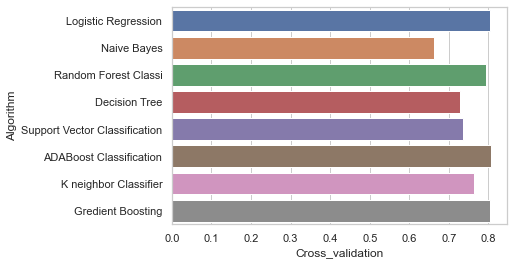

In [170]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

### ADA Boost Classifier Has the best performance

In [172]:
col = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

<AxesSubplot:>

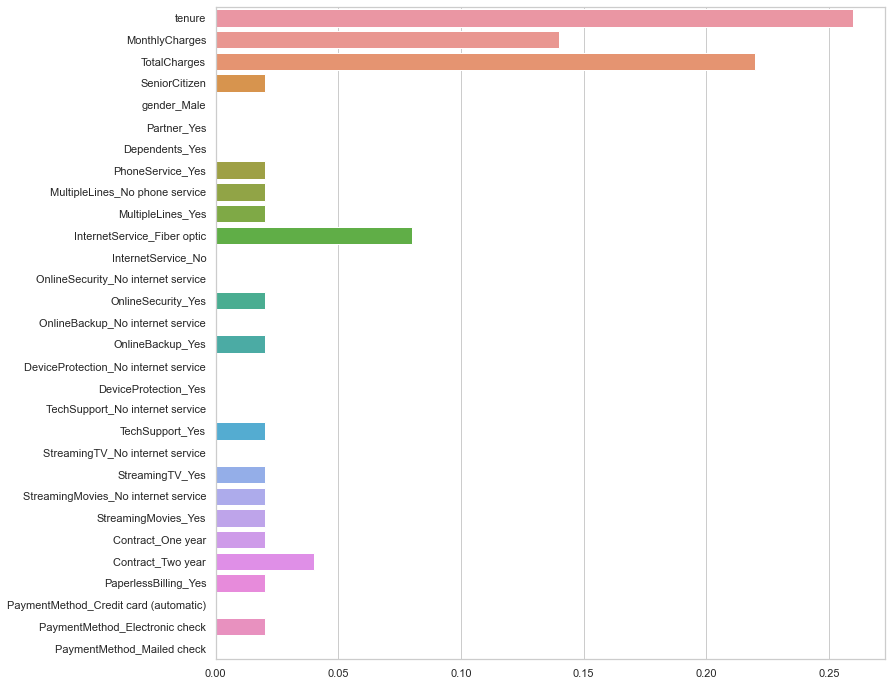

In [173]:
plt.figure(figsize=(12,12))
sns.barplot(y=col,x=mod_6.feature_importances_)

##### So we can clearly observe that Tenure is turning out to be the most useful feature in predicting if the customer will stay or leave

### Hyperparametric Tuning

#### Grid Search Cv

In [174]:
from sklearn.model_selection import GridSearchCV

In [175]:
n_estimators=[50,100]

learning_rate=[0.01,0.05,0.1,0.3,1]

algorithm=["SAMME","SAMME.R"]

#### Parameters for ADA Boost

In [176]:
parameters = {
    "n_estimators":n_estimators,
    "learning_rate":learning_rate,
    "algorithm":algorithm
}

In [177]:
parameters

{'n_estimators': [50, 100],
 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
 'algorithm': ['SAMME', 'SAMME.R']}

In [178]:
es = AdaBoostClassifier()

#### GRID SEARCH CV

In [179]:
grid_search=GridSearchCV(estimator=es,param_grid=parameters,cv=3,n_jobs=-1,verbose=2)

In [180]:
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.7s finished


GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'n_estimators': [50, 100]},
             verbose=2)

#### Best Estinators

In [181]:
grid_search.best_estimator_

AdaBoostClassifier(algorithm='SAMME', learning_rate=1)

#### Best Parameters

In [182]:
grid_search.best_params_

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 50}

#### Best Score

In [183]:
grid_search.best_score_

0.7989411792542116

In [184]:
predictions = grid_search.predict(X_test)

## Confusion Matrix

In [185]:
print(confusion_matrix(y_test,predictions))

[[1209  111]
 [ 211  230]]


## Classification Report

In [186]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1320
           1       0.67      0.52      0.59       441

    accuracy                           0.82      1761
   macro avg       0.76      0.72      0.74      1761
weighted avg       0.81      0.82      0.81      1761



In [187]:
grid_search

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'n_estimators': [50, 100]},
             verbose=2)

## ROC AUC CURVE

In [188]:
from sklearn.metrics import roc_curve,roc_auc_score

In [189]:
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

In [190]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

In [191]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.57575758e-04, 7.57575758e-04, 1.51515152e-03,
       2.27272727e-03, 2.27272727e-03, 2.27272727e-03, 3.78787879e-03,
       3.78787879e-03, 3.78787879e-03, 3.78787879e-03, 3.78787879e-03,
       4.54545455e-03, 5.30303030e-03, 6.06060606e-03, 6.06060606e-03,
       6.81818182e-03, 6.81818182e-03, 7.57575758e-03, 7.57575758e-03,
       8.33333333e-03, 8.33333333e-03, 9.09090909e-03, 9.09090909e-03,
       1.06060606e-02, 1.06060606e-02, 1.13636364e-02, 1.13636364e-02,
       1.21212121e-02, 1.28787879e-02, 1.28787879e-02, 1.36363636e-02,
       1.43939394e-02, 1.51515152e-02, 1.59090909e-02, 1.74242424e-02,
       1.74242424e-02, 1.81818182e-02, 1.89393939e-02, 1.89393939e-02,
       1.89393939e-02, 1.89393939e-02, 2.04545455e-02, 2.19696970e-02,
       2.27272727e-02, 2.27272727e-02, 2.34848485e-02, 2.34848485e-02,
       2.42424242e-02, 2.42424242e-02, 2.50000000e-02, 2.50000000e-02,
      

In [192]:
tpr

array([0.        , 0.00453515, 0.01133787, 0.01360544, 0.02040816,
       0.02267574, 0.02494331, 0.03174603, 0.03628118, 0.04535147,
       0.05668934, 0.08390023, 0.09297052, 0.0952381 , 0.10204082,
       0.10657596, 0.12244898, 0.12471655, 0.12471655, 0.1292517 ,
       0.13151927, 0.13605442, 0.14739229, 0.15873016, 0.16553288,
       0.16780045, 0.17006803, 0.17913832, 0.18367347, 0.18820862,
       0.19274376, 0.19727891, 0.20181406, 0.20181406, 0.20408163,
       0.21088435, 0.21315193, 0.21315193, 0.2154195 , 0.22222222,
       0.22902494, 0.23582766, 0.23582766, 0.24489796, 0.25396825,
       0.2585034 , 0.2675737 , 0.2675737 , 0.26984127, 0.27210884,
       0.27210884, 0.27437642, 0.27891156, 0.28117914, 0.28117914,
       0.28571429, 0.28571429, 0.28798186, 0.28798186, 0.29478458,
       0.29931973, 0.30385488, 0.30385488, 0.30612245, 0.30839002,
       0.31292517, 0.31746032, 0.31746032, 0.31972789, 0.31972789,
       0.32879819, 0.33106576, 0.33560091, 0.33560091, 0.33786

In [193]:
thresholds

array([1.58952086, 0.58952086, 0.58170947, 0.57525197, 0.57431293,
       0.56999751, 0.56754418, 0.56642498, 0.56349488, 0.56254962,
       0.55560847, 0.55461273, 0.55340825, 0.55249426, 0.55214059,
       0.54906039, 0.5487243 , 0.54823938, 0.54812003, 0.5468542 ,
       0.54669494, 0.54373891, 0.54356957, 0.54125633, 0.54074136,
       0.54030219, 0.54025505, 0.53886598, 0.53730398, 0.53682415,
       0.53620627, 0.53494653, 0.53478664, 0.53435989, 0.53433617,
       0.53415789, 0.53412344, 0.53371786, 0.5335264 , 0.53320172,
       0.53198838, 0.53178092, 0.53115574, 0.53008194, 0.52990076,
       0.52956654, 0.52915812, 0.52819229, 0.52785402, 0.52774108,
       0.52758962, 0.52730305, 0.52692998, 0.52639961, 0.52631842,
       0.52605553, 0.52597214, 0.52536317, 0.52534497, 0.5251818 ,
       0.52454896, 0.52367409, 0.52348033, 0.52304372, 0.52258794,
       0.52220808, 0.52217354, 0.52205376, 0.52124937, 0.52098463,
       0.51971184, 0.51907524, 0.51877653, 0.51849808, 0.51804

Text(0.5, 1.0, 'ADA Boost Algorithm')

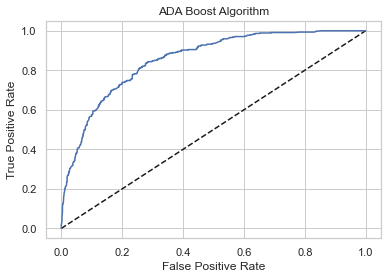

In [194]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="ADA Boost Classification")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ADA Boost Algorithm')

#### The model is performing good

## Saving the model using Pickle

In [195]:
import pickle

In [196]:
with open("model_pickle","wb") as f:
    
    pickle.dump(grid_search,f)

In [197]:
with open("model_pickle","rb") as f:
    
    churn = pickle.load(f)

## Conclusion

In [198]:
cm = confusion_matrix(y_test,predictions)

<AxesSubplot:>

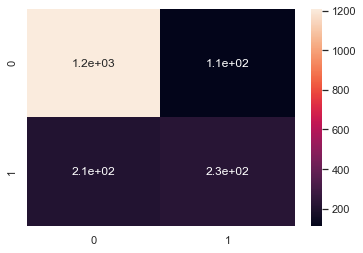

In [199]:
sns.heatmap(data=cm,annot=True)

In [200]:
# Comparing predicted value vs actual value
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Most of the predictions are right

In [201]:
df.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [207]:
# The model needs to predict 0 i.e the customer will stay
# for this inputs
df.iloc[1,0:].values

array([3.4000e+01, 5.6950e+01, 1.8895e+03, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00])

In [208]:
churn.predict(sc.transform([[3.4000e+01, 5.6950e+01, 1.8895e+03, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00]]))

array([0], dtype=int64)

### The model predicted right for an individual values